In [ ]:
import pandas as pd

# File paths
files = {
    "activities": "/content/activities108.csv",
    "dailies": "/content/dailies108.csv",
    "epochs": "/content/epochs108 .csv", # 注意文件名中的空格
    "sleeps_levelsmap": "/content/sleeps_levelsmap108.csv",
    "sleeps_sleepSpo2": "/content/sleeps_sleepSpo2108.csv",
    "sleeps": "/content/sleeps108.csv"
}

# Load and display the first few rows of each file to understand their structure
dataframes = {}
for key, file in files.items():
    dataframes[key] = pd.read_csv(file)
    print(f"First few rows of {key}:\n", dataframes[key].head(), "\n")

# Display the column names of each dataframe
column_names = {key: df.columns.tolist() for key, df in dataframes.items()}
column_names

In [ ]:
# Check for common keys between datasets (like date or ID) that can be used to join them
common_keys = {}

# Comparing keys between each pair of datasets
for key1, df1 in dataframes.items():
    for key2, df2 in dataframes.items():
        if key1 != key2:
            common_keys_between = set(df1.columns).intersection(set(df2.columns))
            common_keys[f"{key1}-{key2}"] = list(common_keys_between)

common_keys

In [ ]:
# Inspecting the content of the activities and sleeps dataframes to determine the best merging strategy
activities_df = dataframes["activities"]
sleeps_df = dataframes["sleeps"]

# Displaying the first few rows to understand their structure
activities_head = activities_df.head()
sleeps_head = sleeps_df.head()

activities_head, sleeps_head

In [ ]:
# Merging the activities and sleeps dataframes on 'date' and 'id'
merged_df = pd.merge(activities_df, sleeps_df, on=['date', 'id'], suffixes=('_act', '_sleep'))

# Performing descriptive statistics on the merged dataframe
descriptive_stats = merged_df.describe(include='all')
descriptive_stats



In [ ]:
import numpy as np

# Selecting relevant columns for correlation analysis
columns_for_correlation = [
    'durationInSeconds_act', 'averageHeartRateInBeatsPerMinute',
    'deepSleepDurationInSeconds', 'lightSleepDurationInSeconds',
    'remSleepInSeconds', 'awakeDurationInSeconds'
]

# Calculating Pearson correlation coefficients
correlation_matrix = merged_df[columns_for_correlation].corr()

correlation_matrix



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Preparing the data for regression analysis
X = merged_df[['durationInSeconds_act', 'averageHeartRateInBeatsPerMinute']]
y = merged_df['deepSleepDurationInSeconds']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Coefficients of the model
coefficients = model.coef_

mse, r2, coefficients



In [ ]:
# Defining heart rate intensity ranges
low_intensity_max = 185 * 0.60
medium_intensity_min = low_intensity_max
medium_intensity_max = 185 * 0.80
high_intensity_min = medium_intensity_max

# Creating a new column for intensity group
conditions = [
    (merged_df['averageHeartRateInBeatsPerMinute'] < low_intensity_max),
    (merged_df['averageHeartRateInBeatsPerMinute'] >= medium_intensity_min) & (merged_df['averageHeartRateInBeatsPerMinute'] <= medium_intensity_max),
    (merged_df['averageHeartRateInBeatsPerMinute'] > high_intensity_min)
]
choices = ['low', 'medium', 'high']
merged_df['intensity_group'] = np.select(conditions, choices, default='unknown')

# Grouping by intensity and calculating the mean deep sleep duration
grouped_deep_sleep = merged_df.groupby('intensity_group')['deepSleepDurationInSeconds'].mean().reset_index()

grouped_deep_sleep



In [ ]:
# Displaying the first few rows of the dailies dataframe to understand its structure
dailies_df = dataframes["dailies"]

dailies_df.head()

In [ ]:
# Since we are using dailies.csv for both exercise and stress data, we don't need to merge.
# Instead, we will focus on the relevant columns for exercise and stress.

# Selecting relevant columns for exercise and stress
exercise_stress_columns = [
    'activeKilocalories', 'steps', 'distanceInMeters', 'durationInSeconds', 'activeTimeInSeconds',
    'averageStressLevel', 'maxStressLevel', 'lowStressDurationInSeconds',
    'mediumStressDurationInSeconds', 'highStressDurationInSeconds'
]

# Performing descriptive statistics on the selected columns
descriptive_stats_exercise_stress = dailies_df[exercise_stress_columns].describe()
descriptive_stats_exercise_stress



In [ ]:
# Calculating Pearson correlation coefficients for exercise and stress variables
correlation_matrix_exercise_stress = dailies_df[exercise_stress_columns].corr()

correlation_matrix_exercise_stress



In [ ]:
# Preparing the data for regression analysis
X_stress = dailies_df[['durationInSeconds', 'activeKilocalories']] # Independent variables
y_stress = dailies_df['averageStressLevel'] # Dependent variable

# Splitting the data into training and testing sets
X_train_stress, X_test_stress, y_train_stress, y_test_stress = train_test_split(X_stress, y_stress, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model_stress = LinearRegression()
model_stress.fit(X_train_stress, y_train_stress)

# Making predictions and evaluating the model
y_pred_stress = model_stress.predict(X_test_stress)
mse_stress = mean_squared_error(y_test_stress, y_pred_stress)
r2_stress = r2_score(y_test_stress, y_pred_stress)

# Coefficients of the model
coefficients_stress = model_stress.coef_

mse_stress, r2_stress, coefficients_stress



In [ ]:
# We have already merged the activities and sleeps dataframes earlier
# Re-using the merged dataframe for descriptive statistics
descriptive_stats_sleep_exercise = merged_df[['durationInSeconds_act', 'averageHeartRateInBeatsPerMinute',
                                              'deepSleepDurationInSeconds', 'lightSleepDurationInSeconds',
                                              'remSleepInSeconds', 'awakeDurationInSeconds']].describe()

descriptive_stats_sleep_exercise



,durationInSeconds_act,averageHeartRateInBeatsPerMinute,deepSleepDurationInSeconds,lightSleepDurationInSeconds,remSleepInSeconds,awakeDurationInSeconds
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,1515.226073,98.603960,4967.920792,15787.029703,3949.900990,801.881188
std,2774.655878,12.202625,4280.562020,4847.791020,3309.328811,934.038645
min,1.000000,73.000000,0.000000,1680.000000,0.000000,0.000000
25%,763.000000,89.000000,1935.000000,12840.000000,0.000000,120.000000
50%,907.000000,97.000000,3810.000000,16080.000000,4620.000000,540.000000
75%,1291.000000,107.000000,6045.000000,19140.000000,6540.000000,1140.000000
max,22964.000000,142.000000,21660.000000,24840.000000,13860.000000,5580.000000


In [ ]:
# Calculating Pearson correlation coefficients for exercise and sleep variables
correlation_matrix_sleep_exercise = merged_df[['durationInSeconds_act', 'averageHeartRateInBeatsPerMinute',
                                               'deepSleepDurationInSeconds', 'lightSleepDurationInSeconds',
                                               'remSleepInSeconds', 'awakeDurationInSeconds']].corr()

correlation_matrix_sleep_exercise



,durationInSeconds_act,averageHeartRateInBeatsPerMinute,deepSleepDurationInSeconds,lightSleepDurationInSeconds,remSleepInSeconds,awakeDurationInSeconds
durationInSeconds_act,1.000000,0.251815,-0.069677,0.021138,-0.029122,0.021406
averageHeartRateInBeatsPerMinute,0.251815,1.000000,-0.020041,0.003801,-0.088812,0.031320
deepSleepDurationInSeconds,-0.069677,-0.020041,1.000000,-0.152387,-0.601487,-0.104532
lightSleepDurationInSeconds,0.021138,0.003801,-0.152387,1.000000,0.260536,0.211913
remSleepInSeconds,-0.029122,-0.088812,-0.601487,0.260536,1.000000,0.052710
awakeDurationInSeconds,0.021406,0.031320,-0.104532,0.211913,0.052710,1.000000


In [ ]:
# Preparing the data for regression analysis with deep sleep duration as the dependent variable
X_sleep = merged_df[['durationInSeconds_act', 'averageHeartRateInBeatsPerMinute']] # Independent variables
y_sleep = merged_df['deepSleepDurationInSeconds'] # Dependent variable

# Splitting the data into training and testing sets for sleep analysis
X_train_sleep, X_test_sleep, y_train_sleep, y_test_sleep = train_test_split(X_sleep, y_sleep, test_size=0.2, random_state=42)

# Creating and training the linear regression model for sleep analysis
model_sleep = LinearRegression()
model_sleep.fit(X_train_sleep, y_train_sleep)

# Making predictions and evaluating the model for sleep analysis
y_pred_sleep = model_sleep.predict(X_test_sleep)
mse_sleep = mean_squared_error(y_test_sleep, y_pred_sleep)
r2_sleep = r2_score(y_test_sleep, y_pred_sleep)

# Coefficients of the model for sleep analysis
coefficients_sleep = model_sleep.coef_

mse_sleep, r2_sleep, coefficients_sleep



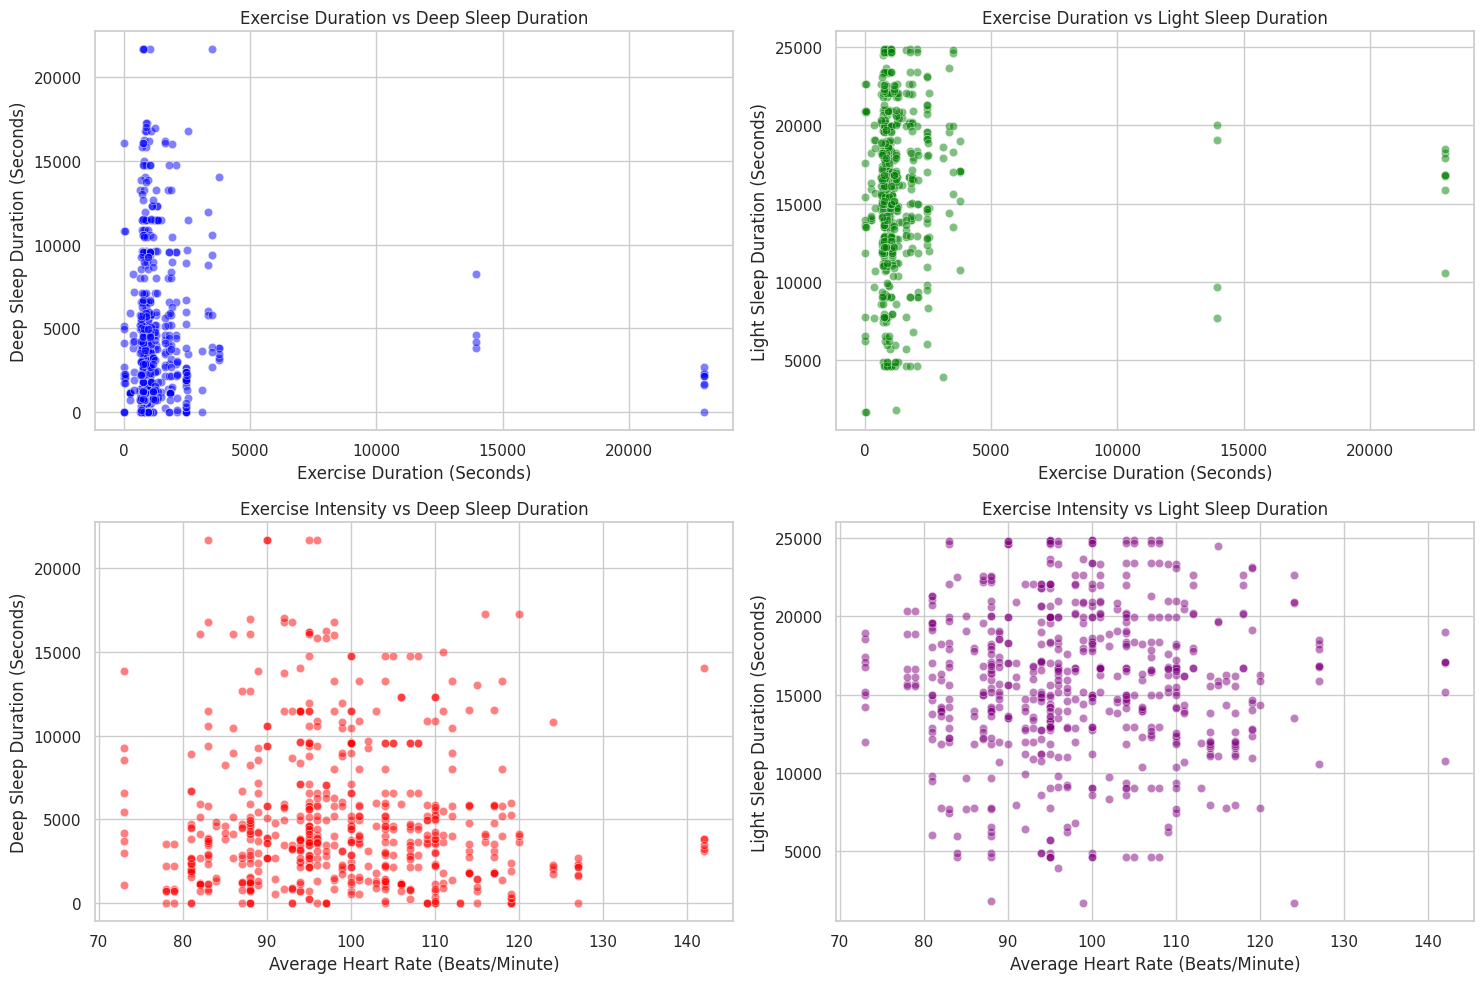

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating a figure for multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plots for exercise duration vs sleep stages
sns.scatterplot(ax=axes[0, 0], data=merged_df, x='durationInSeconds_act', y='deepSleepDurationInSeconds', color='blue', alpha=0.5)
axes[0, 0].set_title('Exercise Duration vs Deep Sleep Duration')
axes[0, 0].set_xlabel('Exercise Duration (Seconds)')
axes[0, 0].set_ylabel('Deep Sleep Duration (Seconds)')

sns.scatterplot(ax=axes[0, 1], data=merged_df, x='durationInSeconds_act', y='lightSleepDurationInSeconds', color='green', alpha=0.5)
axes[0, 1].set_title('Exercise Duration vs Light Sleep Duration')
axes[0, 1].set_xlabel('Exercise Duration (Seconds)')
axes[0, 1].set_ylabel('Light Sleep Duration (Seconds)')

# Scatter plots for exercise intensity vs sleep stages
sns.scatterplot(ax=axes[1, 0], data=merged_df, x='averageHeartRateInBeatsPerMinute', y='deepSleepDurationInSeconds', color='red', alpha=0.5)
axes[1, 0].set_title('Exercise Intensity vs Deep Sleep Duration')
axes[1, 0].set_xlabel('Average Heart Rate (Beats/Minute)')
axes[1, 0].set_ylabel('Deep Sleep Duration (Seconds)')

sns.scatterplot(ax=axes[1, 1], data=merged_df, x='averageHeartRateInBeatsPerMinute', y='lightSleepDurationInSeconds', color='purple', alpha=0.5)
axes[1, 1].set_title('Exercise Intensity vs Light Sleep Duration')
axes[1, 1].set_xlabel('Average Heart Rate (Beats/Minute)')
axes[1, 1].set_ylabel('Light Sleep Duration (Seconds)')

plt.tight_layout()
plt.show()



In [ ]:
############################################################################################################################################################

In [ ]:
import pandas as pd

# Load the first dataset
file_path_activities = '/content/activities108.csv'
activities_data = pd.read_csv(file_path_activities)

# Display the first few rows and the structure of the dataset
activities_data.info(), activities_data.head()


In [ ]:
# Load the second dataset
file_path_dailies = '/content/dailies108.csv'
dailies_data = pd.read_csv(file_path_dailies)

# Display the first few rows and the structure of the dataset
dailies_data.info(), dailies_data.head()


In [ ]:
# Load the third dataset
file_path_epochs = '/content/epochs108 .csv'  # Note the space in the filename
epochs_data = pd.read_csv(file_path_epochs)

# Display the first few rows and the structure of the dataset
epochs_data.info(), epochs_data.head()


In [ ]:
# Load the fourth dataset
file_path_sleeps_levelsmap = '/content/sleeps_levelsmap108.csv'
sleeps_levelsmap_data = pd.read_csv(file_path_sleeps_levelsmap)

# Display the first few rows and the structure of the dataset
sleeps_levelsmap_data.info(), sleeps_levelsmap_data.head()


In [ ]:
# Load the sixth dataset
file_path_sleeps = '/content/sleeps108.csv'
sleeps_data = pd.read_csv(file_path_sleeps)

# Display the first few rows and the structure of the dataset
sleeps_data.info(), sleeps_data.head()


In [ ]:
# Combining relevant columns from the activities and dailies datasets
combined_activities_dailies = pd.merge(
    activities_data[['date', 'durationInSeconds', 'steps', 'distanceInMeters', 'new_id']],
    dailies_data[['date', 'steps', 'distanceInMeters', 'activeTimeInSeconds', 'new_id']],
    on=['date', 'new_id'],
    how='outer',
    suffixes=('_act', '_daily')
)

# Renaming columns for clarity
combined_activities_dailies.rename(
    columns={
        'durationInSeconds': 'activityDurationInSeconds',
        'steps_act': 'stepsActivity',
        'steps_daily': 'stepsDaily',
        'distanceInMeters_act': 'distanceActivityInMeters',
        'distanceInMeters_daily': 'distanceDailyInMeters',
        'activeTimeInSeconds': 'activeTimeDailyInSeconds'
    },
    inplace=True
)

# Combining the above with sleep data
combined_data = pd.merge(
    combined_activities_dailies,
    sleeps_data[['date', 'deepSleepDurationInSeconds', 'lightSleepDurationInSeconds', 'remSleepInSeconds', 'durationInSeconds', 'new_id']],
    on=['date', 'new_id'],
    how='outer'
)

# Renaming sleep columns for clarity
combined_data.rename(
    columns={
        'durationInSeconds': 'totalSleepDurationInSeconds',
        'deepSleepDurationInSeconds': 'deepSleepInSeconds',
        'lightSleepDurationInSeconds': 'lightSleepInSeconds',
        'remSleepInSeconds': 'remSleepInSeconds'
    },
    inplace=True
)

# Checking the combined dataset
combined_data.info(), combined_data.head()


In [ ]:
# Data Cleaning: Handling missing values and checking for anomalies

# Dropping rows where key sleep or activity metrics are missing
cleaned_data = combined_data.dropna(subset=[
    'activityDurationInSeconds',
    'stepsActivity',
    'distanceActivityInMeters',
    'deepSleepInSeconds',
    'lightSleepInSeconds',
    'remSleepInSeconds',
    'totalSleepDurationInSeconds'
])

# Checking for any obvious anomalies (e.g., negative values, exceptionally high values)
anomaly_checks = {
    'activityDurationInSeconds': cleaned_data['activityDurationInSeconds'] > 0,
    'stepsActivity': cleaned_data['stepsActivity'] >= 0,
    'distanceActivityInMeters': cleaned_data['distanceActivityInMeters'] >= 0,
    'deepSleepInSeconds': cleaned_data['deepSleepInSeconds'] >= 0,
    'lightSleepInSeconds': cleaned_data['lightSleepInSeconds'] >= 0,
    'remSleepInSeconds': cleaned_data['remSleepInSeconds'] >= 0,
    'totalSleepDurationInSeconds': cleaned_data['totalSleepDurationInSeconds'] > 0
}

# Applying the anomaly checks
for column, condition in anomaly_checks.items():
    cleaned_data = cleaned_data[condition]

# Checking the cleaned dataset
cleaned_data.info(), cleaned_data.head()


In [ ]:
# Descriptive Statistics
desc_stats = cleaned_data.describe()

# Calculating correlation matrix to explore relationships
correlation_matrix = cleaned_data.corr()

# Displaying descriptive statistics and correlation matrix
desc_stats, correlation_matrix



<ipython-input-26-4964ffb30ef9>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_data.corr()


(              date  activityDurationInSeconds  stepsActivity  \
 count  3805.000000                3805.000000    3805.000000   
 mean    519.935611                1539.024967    1745.647832   
 std      19.848037                2800.807945    1053.189287   
 min     505.000000                   1.000000      38.000000   
 25%     512.000000                 760.000000    1180.000000   
 50%     514.000000                 907.000000    1412.000000   
 75%     517.000000                1323.000000    1820.000000   
 max     604.000000               22964.000000    6742.000000   
 
        distanceActivityInMeters    stepsDaily  distanceDailyInMeters  \
 count               3805.000000   3770.000000            3770.000000   
 mean                1152.140683   5237.413263            3714.069496   
 std                  704.200323   4675.915465            3285.794376   
 min                   17.470000      0.000000               0.000000   
 25%                  756.990000    400.000000  

In [ ]:
# Displaying the correlation matrix again for reference
correlation_matrix_display = correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)
correlation_matrix_display



<ipython-input-27-13b39254c1be>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation_matrix_display = correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)


,date,activityDurationInSeconds,stepsActivity,distanceActivityInMeters,stepsDaily,distanceDailyInMeters,activeTimeDailyInSeconds,deepSleepInSeconds,lightSleepInSeconds,remSleepInSeconds,totalSleepDurationInSeconds
date,1.00,-0.10,-0.05,-0.08,-0.11,-0.10,-0.11,-0.05,0.06,-0.05,-0.01
activityDurationInSeconds,-0.10,1.00,0.00,0.01,0.14,0.13,0.11,-0.07,0.02,-0.04,-0.05
stepsActivity,-0.05,0.00,1.00,0.97,0.02,0.02,0.00,0.05,0.02,-0.00,0.05
distanceActivityInMeters,-0.08,0.01,0.97,1.00,0.00,0.00,-0.01,0.06,0.03,0.02,0.07
stepsDaily,-0.11,0.14,0.02,0.00,1.00,1.00,0.96,0.09,0.09,-0.03,0.11
distanceDailyInMeters,-0.10,0.13,0.02,0.00,1.00,1.00,0.96,0.08,0.08,-0.02,0.10
activeTimeDailyInSeconds,-0.11,0.11,0.00,-0.01,0.96,0.96,1.00,0.08,0.10,-0.02,0.12
deepSleepInSeconds,-0.05,-0.07,0.05,0.06,0.09,0.08,0.08,1.00,-0.17,-0.58,0.22
lightSleepInSeconds,0.06,0.02,0.02,0.03,0.09,0.08,0.10,-0.17,1.00,0.25,0.82
remSleepInSeconds,-0.05,-0.04,-0.00,0.02,-0.03,-0.02,-0.02,-0.58,0.25,1.00,0.37


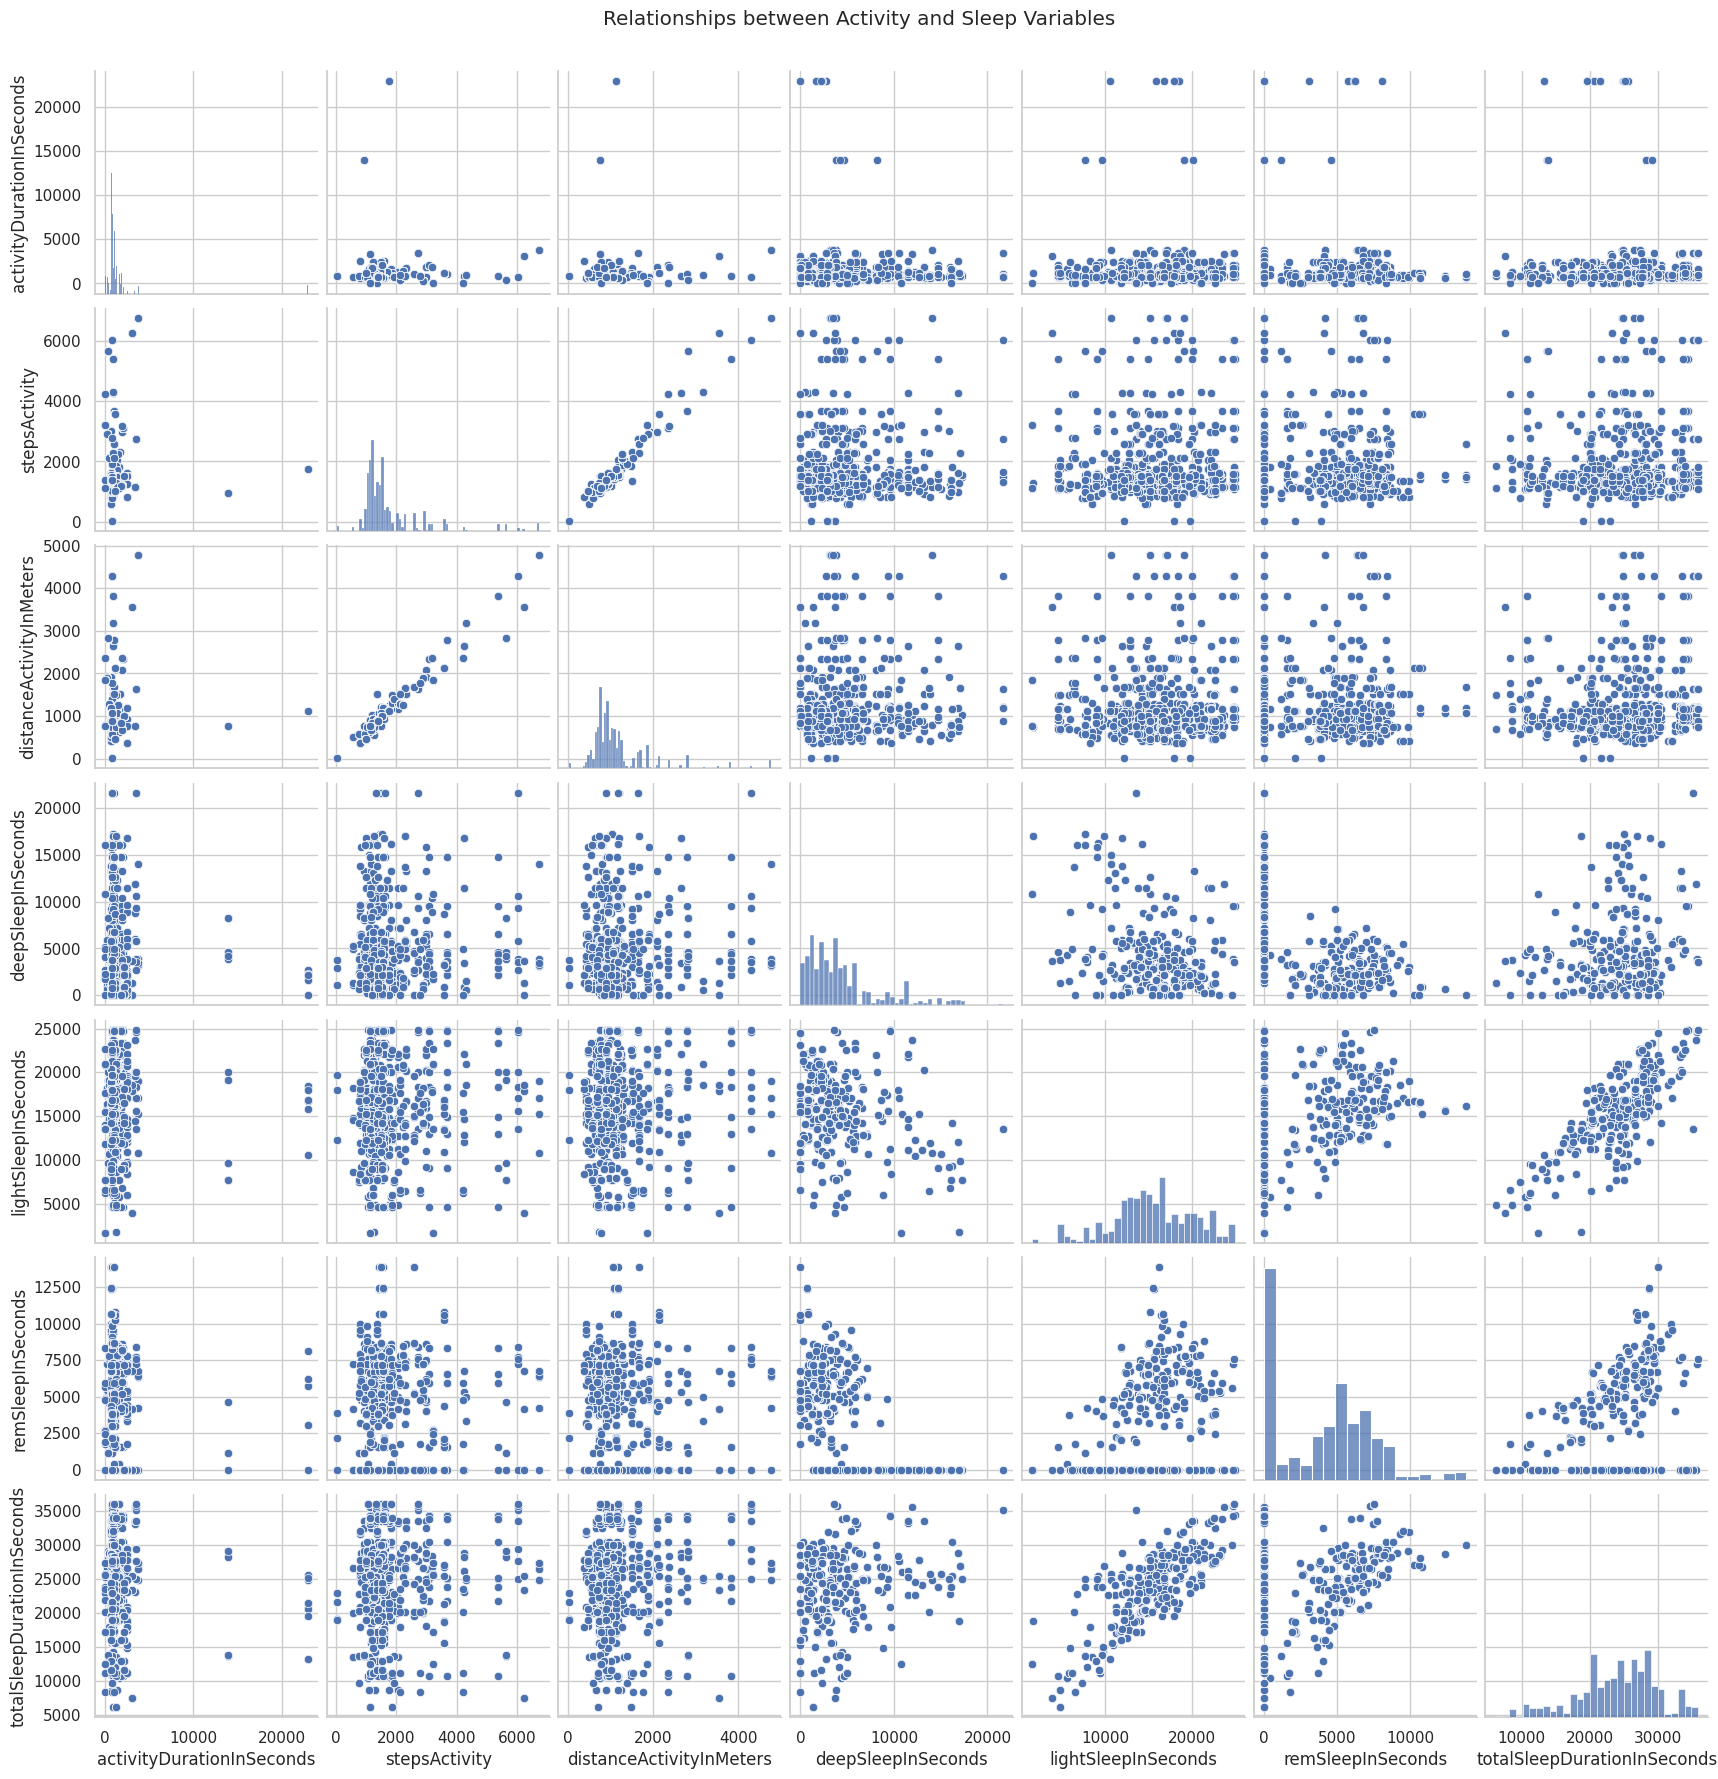

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a subset of the data for visualization
visualization_data = cleaned_data[['activityDurationInSeconds', 'stepsActivity', 'distanceActivityInMeters',
                                   'deepSleepInSeconds', 'lightSleepInSeconds', 'remSleepInSeconds', 'totalSleepDurationInSeconds']]

# Pairplot to visualize the relationships between activity and sleep variables
pairplot = sns.pairplot(visualization_data)
plt.suptitle("Relationships between Activity and Sleep Variables", y=1.02)

# Showing the plot
plt.show()


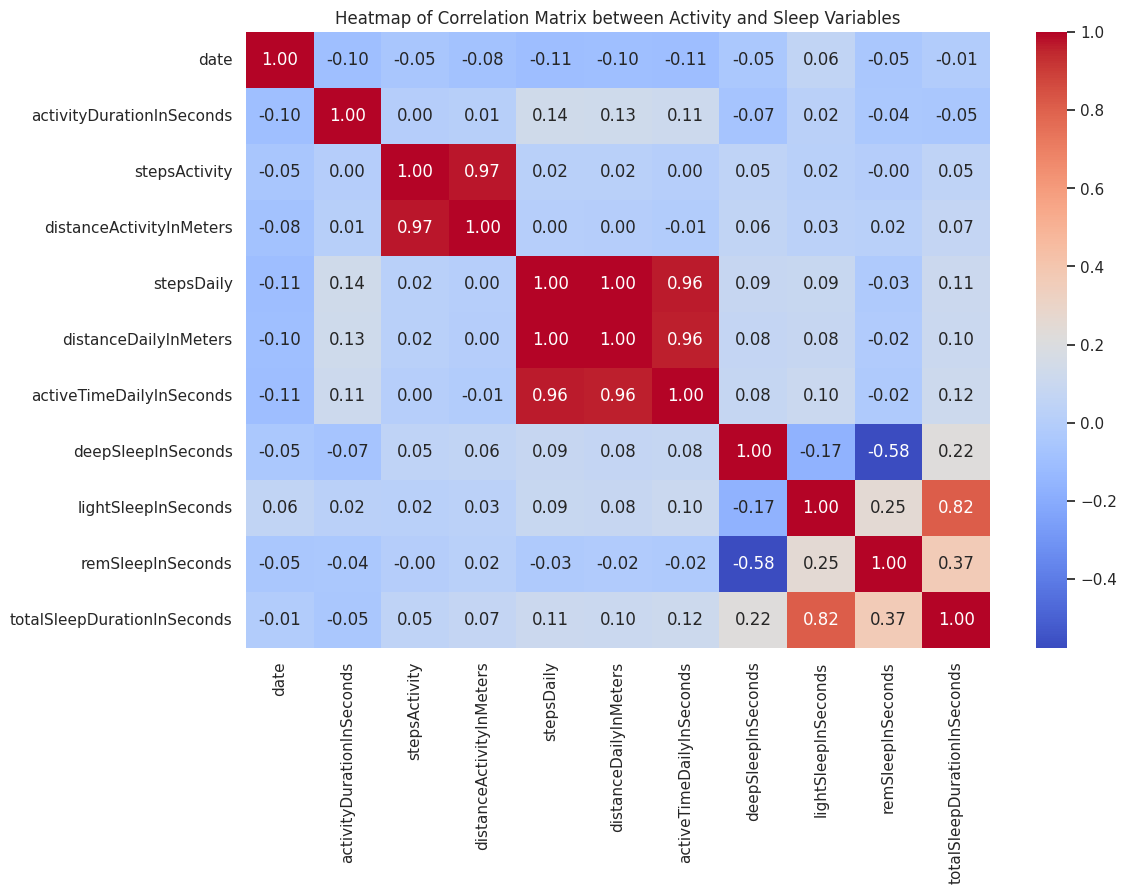

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix between Activity and Sleep Variables")
plt.show()


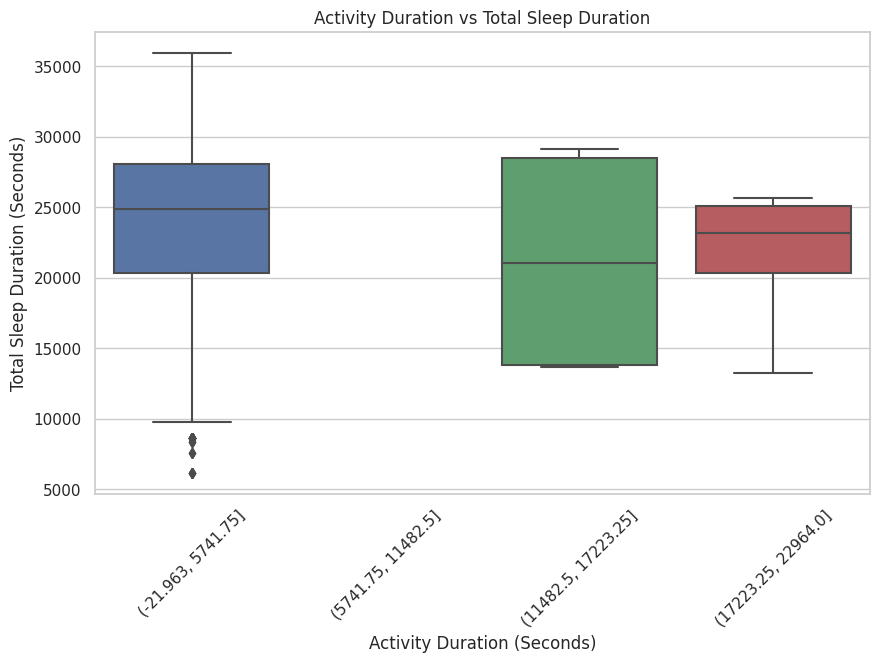

In [ ]:
# Boxplot of activity duration vs total sleep duration
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(visualization_data['activityDurationInSeconds'], bins=4),
            y='totalSleepDurationInSeconds',
            data=visualization_data)
plt.title("Activity Duration vs Total Sleep Duration")
plt.xlabel("Activity Duration (Seconds)")
plt.ylabel("Total Sleep Duration (Seconds)")
plt.xticks(rotation=45)
plt.show()


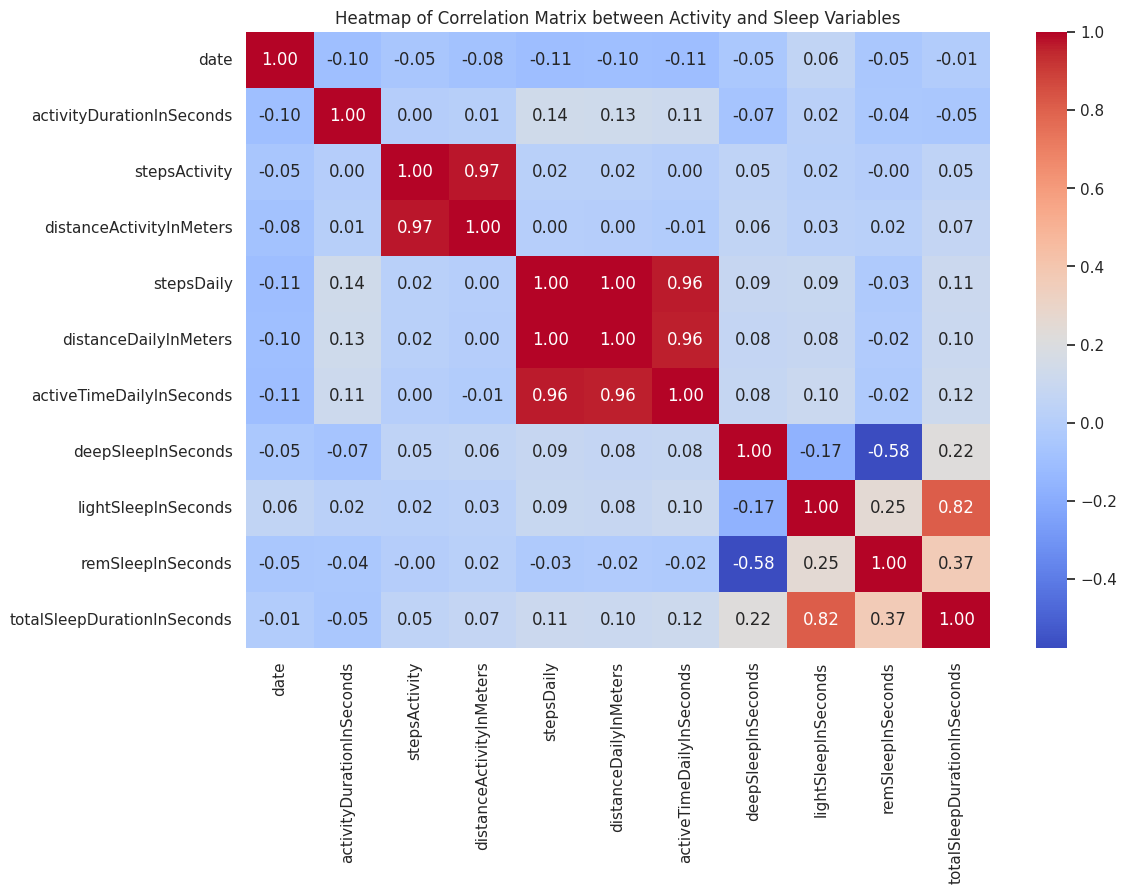

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix between Activity and Sleep Variables")
plt.show()


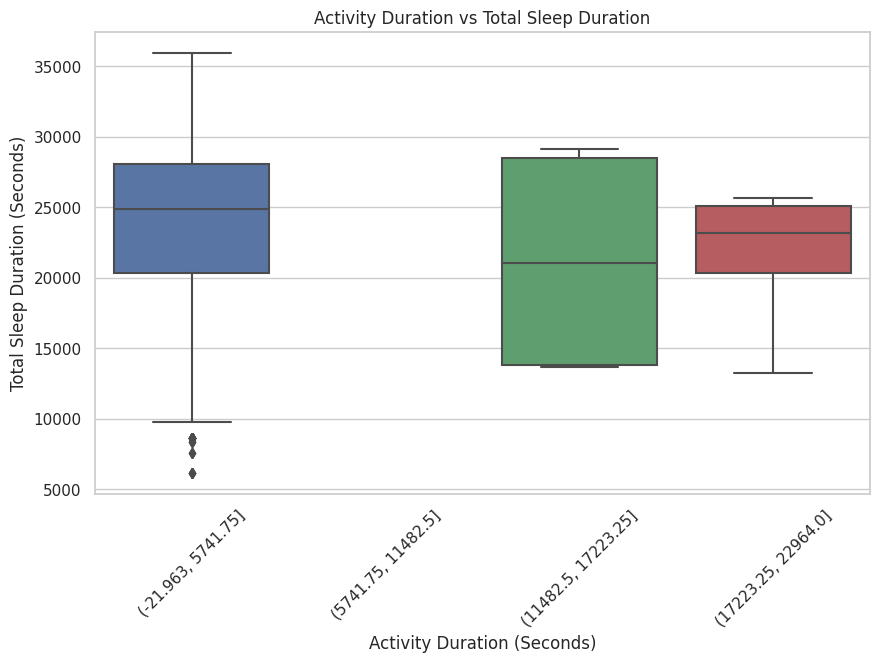

In [ ]:
# Boxplot of activity duration vs total sleep duration
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(visualization_data['activityDurationInSeconds'], bins=4),
            y='totalSleepDurationInSeconds',
            data=visualization_data)
plt.title("Activity Duration vs Total Sleep Duration")
plt.xlabel("Activity Duration (Seconds)")
plt.ylabel("Total Sleep Duration (Seconds)")
plt.xticks(rotation=45)
plt.show()


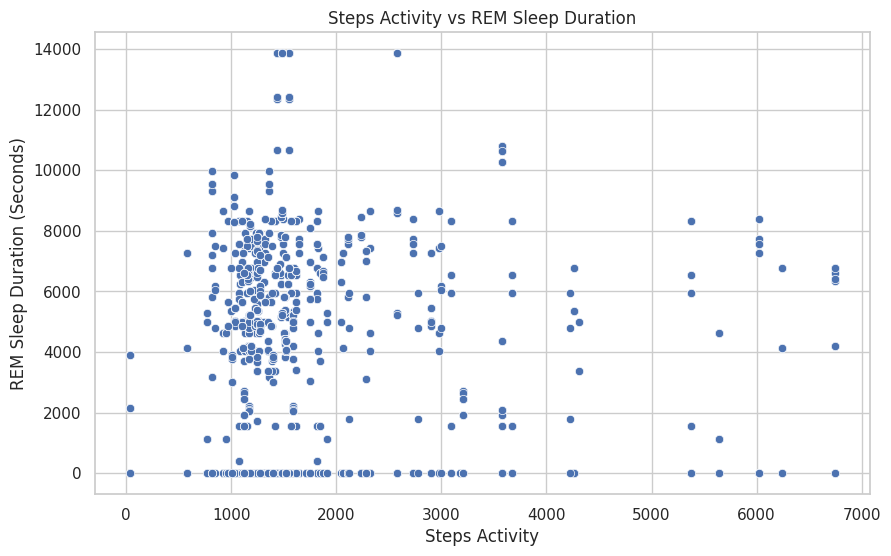

In [ ]:
# Scatter plot of steps activity vs REM sleep duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stepsActivity', y='remSleepInSeconds', data=visualization_data)
plt.title("Steps Activity vs REM Sleep Duration")
plt.xlabel("Steps Activity")
plt.ylabel("REM Sleep Duration (Seconds)")
plt.show()


In [ ]:
import statsmodels.api as sm

# Regression Analysis: Activity Duration vs Total Sleep Duration
# Preparing the data for regression analysis
X = sm.add_constant(cleaned_data['activityDurationInSeconds'])  # Adding a constant for the intercept
y = cleaned_data['totalSleepDurationInSeconds']

# Building the regression model
regression_model = sm.OLS(y, X).fit()

# Displaying the regression results
regression_summary = regression_model.summary()
regression_summary



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     totalSleepDurationInSeconds   R-squared:                       0.003
Model:                                     OLS   Adj. R-squared:                  0.002
Method:                          Least Squares   F-statistic:                     9.959
Date:                         Sat, 23 Dec 2023   Prob (F-statistic):            0.00161
Time:                                 18:13:40   Log-Likelihood:                -38376.
No. Observations:                         3805   AIC:                         7.676e+04
Df Residuals:                             3803   BIC:                         7.677e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.416e+04    107.436    224.858      0.000    2.39e+04    2.44e+04
activityDurationInSeconds    -0.1061      0.034     -3.156      0.002      -0.172      -0.040
==============================================================================
Omnibus:                      146.393   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.838
Skew:                          -0.504   Prob(JB):                     4.37e-36
Kurtosis:                       3.110   Cond. No.                     3.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

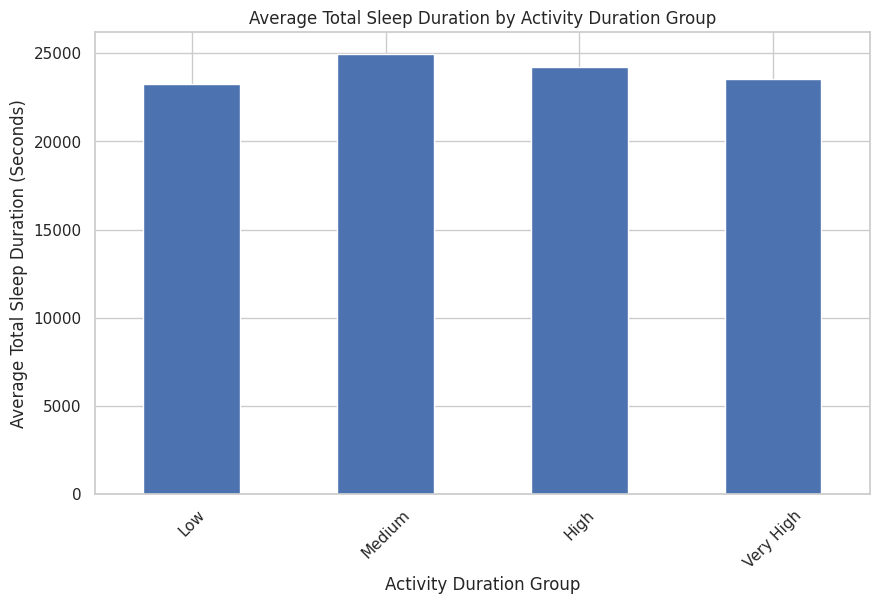

activityDurationInSeconds
Low          23265.015674
Medium       24947.949527
High         24229.674711
Very High    23535.699153
Name: totalSleepDurationInSeconds, dtype: float64

In [ ]:
# Grouping the data based on activity duration
activity_duration_bins = pd.qcut(cleaned_data['activityDurationInSeconds'], 4, labels=["Low", "Medium", "High", "Very High"])
grouped_data = cleaned_data.groupby(activity_duration_bins)['totalSleepDurationInSeconds'].mean()

# Visualizing the grouped data
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.title("Average Total Sleep Duration by Activity Duration Group")
plt.xlabel("Activity Duration Group")
plt.ylabel("Average Total Sleep Duration (Seconds)")
plt.xticks(rotation=45)
plt.show()

grouped_data



In [ ]:
# Regression Analysis for Hypothesis Testing: Activity Duration vs Deep Sleep Duration
# Preparing the data for regression analysis
X_deep_sleep = sm.add_constant(cleaned_data['activityDurationInSeconds'])  # Adding a constant for the intercept
y_deep_sleep = cleaned_data['deepSleepInSeconds']

# Building the regression model for deep sleep duration
regression_model_deep_sleep = sm.OLS(y_deep_sleep, X_deep_sleep).fit()

# Displaying the regression results for deep sleep
regression_summary_deep_sleep = regression_model_deep_sleep.summary()
regression_summary_deep_sleep



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     deepSleepInSeconds   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     16.86
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           4.10e-05
Time:                        18:14:40   Log-Likelihood:                -36935.
No. Observations:                3805   AIC:                         7.387e+04
Df Residuals:                    3803   BIC:                         7.389e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      4636.9836     73.576     63.023      0.000    4492.731    4781.237
activityDurationInSeconds    -0.0945      0.023     -4.106      0.000      -0.140      -0.049
==============================================================================
Omnibus:                      977.132   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2073.708
Skew:                           1.499   Prob(JB):                         0.00
Kurtosis:                       5.024   Cond. No.                     3.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""